<a href="https://colab.research.google.com/github/MariaCarmelaPascale/Pokemon/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook di training

## Import librerie necessarie

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import del training set, del test set e del pokemon.csv

In [334]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
pokemon = pd.read_csv("pokemon.csv")

## Data analysis

####Stampe di carattere generale del training set

In [335]:
#visualizzazione delle prime righe del train
train.head(5)

,Winner,First_pokemon,Second_pokemon
0,382,382,636
1,278,278,404
2,557,88,557
3,366,366,345
4,457,457,356


In [336]:
#visualizzazione della lista delle feature
train.columns

Index(['Winner', 'First_pokemon', 'Second_pokemon'], dtype='object')

In [337]:
train.describe(include="all")

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,409.861094,402.504188,402.972438
std,231.054139,229.858711,229.932855
min,1.000000,1.000000,1.000000
25%,207.000000,204.000000,207.000000
50%,423.000000,402.000000,403.000000
75%,607.000000,600.250000,602.000000
max,800.000000,800.000000,800.000000


In [338]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


In [339]:
#verifico se ci sono valori nulli
pd.isnull(train).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [340]:
train.sample(20)

,Winner,First_pokemon,Second_pokemon
20835,451,189,451
7528,502,683,502
2405,92,92,676
20199,606,729,606
7749,451,283,451
26126,132,132,29
761,59,468,59
29289,425,425,364
18798,647,200,647
10774,550,105,550


####Stampe di carattere generale delle stats delle creature (pokemon.csv)

In [341]:
#visualizzazione delle prime righe del pokemon.csv
pokemon.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [342]:
#visualizzazione della lista delle feature
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#####Rename colonne 

In [343]:
#Dalla stampa precedente si evince che si può rinominare la colonna degli id dei pokemon, chiamate #, in ID.
#Successivamente si rinominano anche le colonne Type 1 e Type 2 in Type1 e Type2 rispettivamente 
#(per evitare nei passaggi successivi eventuali errori dovuti alla presenza dello spazio nel nome)
pokemon = pokemon.rename(columns={'#': 'ID'})
pokemon = pokemon.rename(columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(columns={'Type 2': 'Type2'})

In [344]:
pokemon.describe(include='all')

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Aegislash Blade Forme,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [345]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        799 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [346]:
#verifica se ci sono valori nulli
pd.isnull(pokemon).sum()

ID              0
Name            1
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

######Sono presenti circa 400 valori nulli per la features Type2, per capire come gestire questa situazione continuo effettuando altra analisi.

###Visualizzazione delle features dei pokemon attraverso grafici

####Stampa del numero dei pokemon raggruppati per Generation

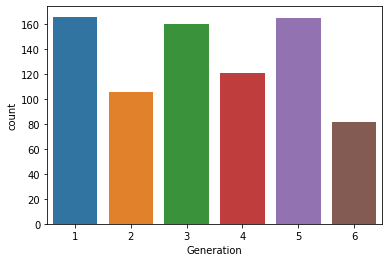

In [347]:
sns.countplot(x=pokemon["Generation"])
plt.show()

######Si evince che i pokemon sono equamente distribuiti tra le diverse Generation



####Stampa del numero dei pokemon raggruppati per Tipologia di Primo Attacco

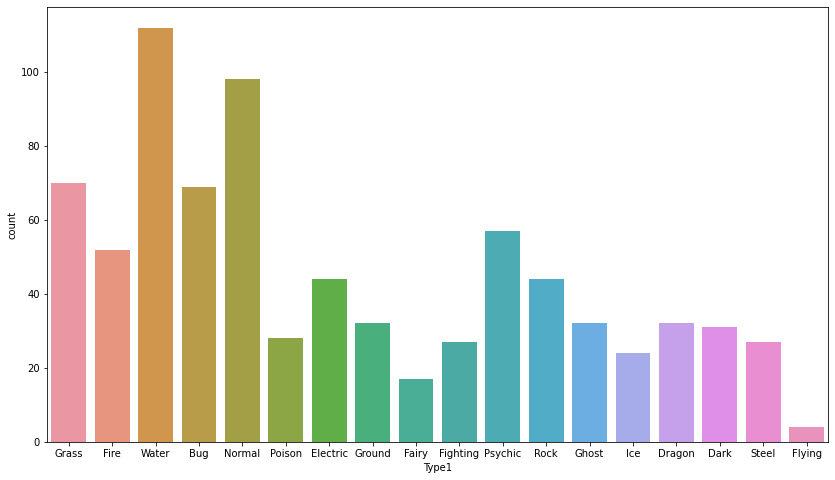

In [348]:
plt.figure(figsize=(14, 8))
sns.countplot(x=pokemon["Type1"])
plt.show()

####Stampa del numero dei pokemon raggruppati per Tipologia di Secondo Attacco

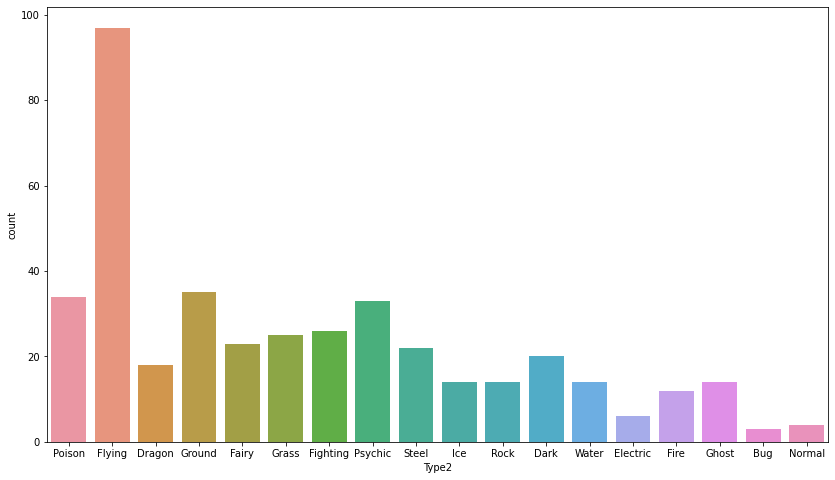

In [349]:
plt.figure(figsize=(14, 8))
sns.countplot(x=pokemon["Type2"])
plt.show()

#####In questo caso risulta più evidente che il secondo attacco è tipicamente di tipo 'Flying'

####Stampa del numero di pokemon leggendari e non leggendari

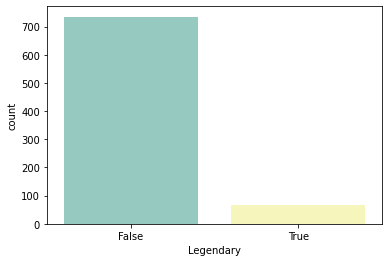

In [350]:
sns.countplot(x=pokemon["Legendary"], palette='Set3')
plt.show()

#####Si evince che i pokemon leggendari sono molto più rari, circa 1/7

####Verifico se esiste qualche correlazione tra il fatto di essere un pokemon leggendario con le altre feautures

#####Legendary vs Attack

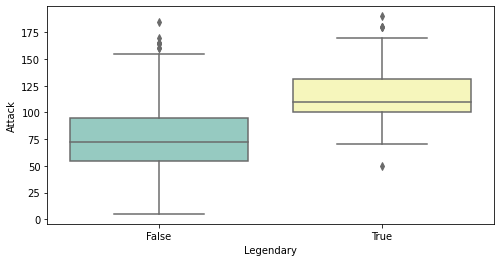

In [351]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Attack',data=pokemon, palette='Set3')
plt.show()

######Mediamente i pokemon leggendari hanno un attacco maggiore, ovvero più forte, rispetto ai non leggendari

#####Legendary vs HP

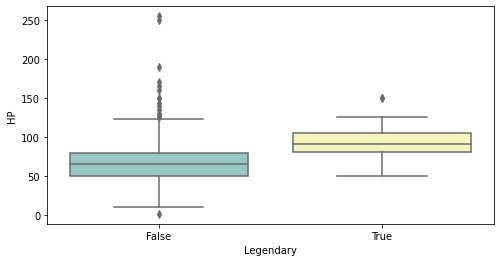

In [352]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='HP',data=pokemon, palette='Set3')
plt.show()

######Anche in questo caso, mediamente, i pokemon leggendari hanno un HP maggiore, ovvero più punti vita

#####Legendary vs Defense

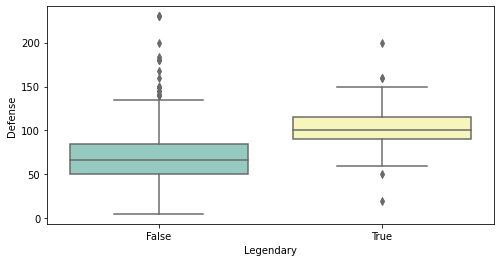

In [353]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Defense',data=pokemon, palette='Set3')
plt.show()

#####Legendary vs Special Attack

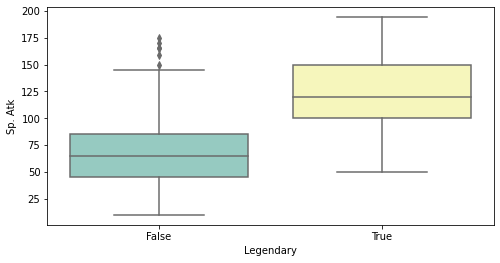

In [354]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Sp. Atk',data=pokemon, palette='Set3')
plt.show()

#####Legendary vs Special Defense

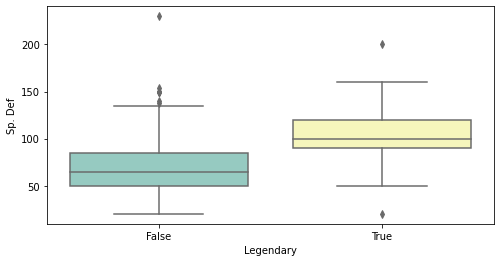

In [355]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Legendary',y='Sp. Def',data=pokemon, palette='Set3')
plt.show()

#####Da queste analisi risulta che mediamente i pokemon leggendari sono più forti rispetto a quelli non leggendari

####Gestione dei tipi nulli


In [356]:
#cerco di analizzare i dati per capire come gestire i tipi nulli presenti nella features Type2
#definisco un DataFrame contenente solo i pokemon che non hanno il secondo attacco
type2null = pokemon.loc[pokemon['Type2'].isnull()]

In [357]:
type2null

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


######Come sono distribuiti i pokemon senza secondo attacco rispetto alla feature Generation

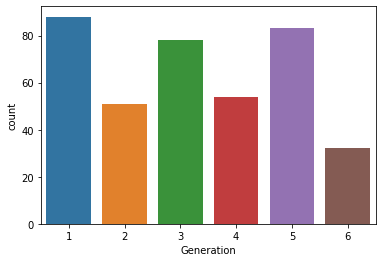

In [358]:
sns.countplot(x=type2null["Generation"])
plt.show()

######Come sono distribuiti i pokemon senza secondo attacco rispetto al fatto di essere leggendari o meno

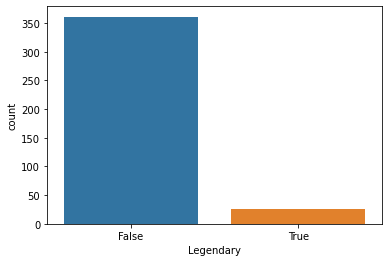

In [359]:
sns.countplot(x=type2null["Legendary"])
plt.show()

#####I pokemon senza secondo attacco, quale primo attacco hanno?

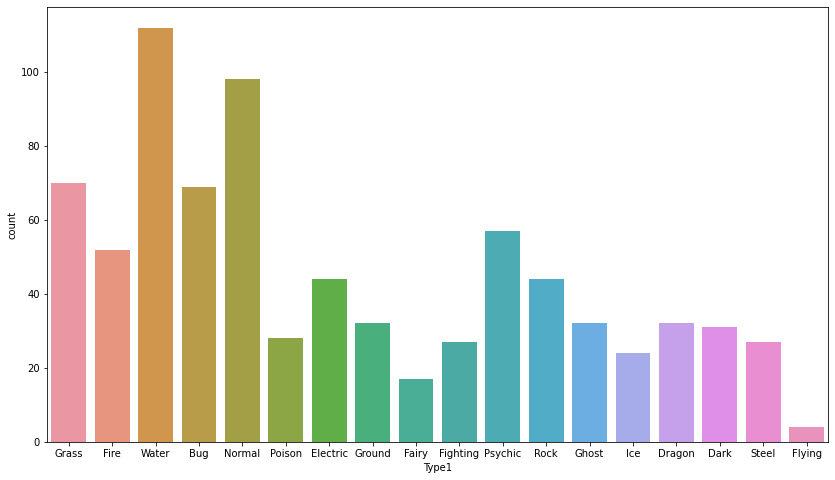

In [360]:
plt.figure(figsize=(14, 8))
sns.countplot(x=pokemon["Type1"])
plt.show()

#####Distribuzione della forza di attacco relativa a pokemon senza il secondo attacco e relativa a tutti i pokemon

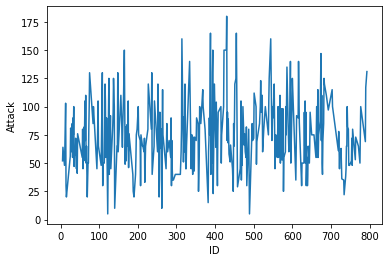

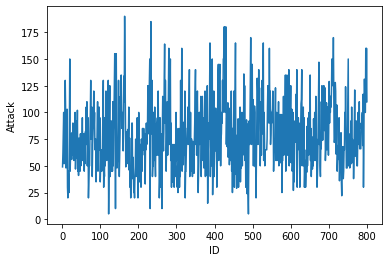

In [361]:
sns.lineplot(data=type2null, x="ID", y="Attack")
plt.show()

sns.lineplot(data=pokemon, x="ID", y="Attack")
plt.show()

#####Da quello che si evince dai grafici, i pokemon senza secondo attacco sono equamente distribuiti. Questa feautures mancante non dipende dal fatto che non sono stati considerati dei dati, ma dipende dal fatto che alcuni pokemon possono avere solo una tipologia di attacco. Si potrebbe pensare di eliminare la colonna, però scelgo di sostituire i valori Nan con None, per indicare che uno specifico pokemon non ha il secondo attacco.

#####Replacement dei valori nulli di Type2 con 'None'

In [362]:
pokemon['Type2'].fillna('None', inplace = True)

In [363]:
pokemon.replace(10)

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,None,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


## Preparazione dei dati

In [364]:
# codifico la colonna 'Winner' assegnando 1 se il vincitore è il primo pokemon che inizia il combattimento (First_pokemon), 0 altrimenti

train.loc[train['Winner'] == train['First_pokemon'], 'Winner'] = 1
train.loc[train['Winner'] == train['Second_pokemon'], 'Winner'] = 0

test.loc[test['Winner'] == test['First_pokemon'], 'Winner'] = 1
test.loc[test['Winner'] == test['Second_pokemon'], 'Winner'] = 0

### Merge dei dati di train/test con i dati dei pokemon

In [365]:
fights = pd.merge(train, pokemon, left_on='First_pokemon', right_on='ID')
fights_test = pd.merge(test, pokemon, left_on='First_pokemon', right_on='ID')

In [366]:
fights = pd.merge(fights, pokemon, left_on='Second_pokemon', right_on='ID')
fights_test = pd.merge(fights_test, pokemon, left_on='Second_pokemon', right_on='ID')

In [367]:
fights.head(5)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,1,382,636,382,Feebas,Water,None,20,15,20,10,55,80,3,False,636,Gothita,Psychic,None,45,30,50,55,65,45,5,False
1,1,366,636,366,Altaria,Dragon,Flying,75,70,90,70,105,80,3,False,636,Gothita,Psychic,None,45,30,50,55,65,45,5,False
2,0,492,636,492,Gible,Dragon,Ground,58,70,45,40,45,42,4,False,636,Gothita,Psychic,None,45,30,50,55,65,45,5,False
3,1,214,636,214,Murkrow,Dark,Flying,60,85,42,85,42,91,2,False,636,Gothita,Psychic,None,45,30,50,55,65,45,5,False
4,1,107,636,107,Krabby,Water,None,30,105,90,25,25,50,1,False,636,Gothita,Psychic,None,45,30,50,55,65,45,5,False


## Studio della correlazione fra le features

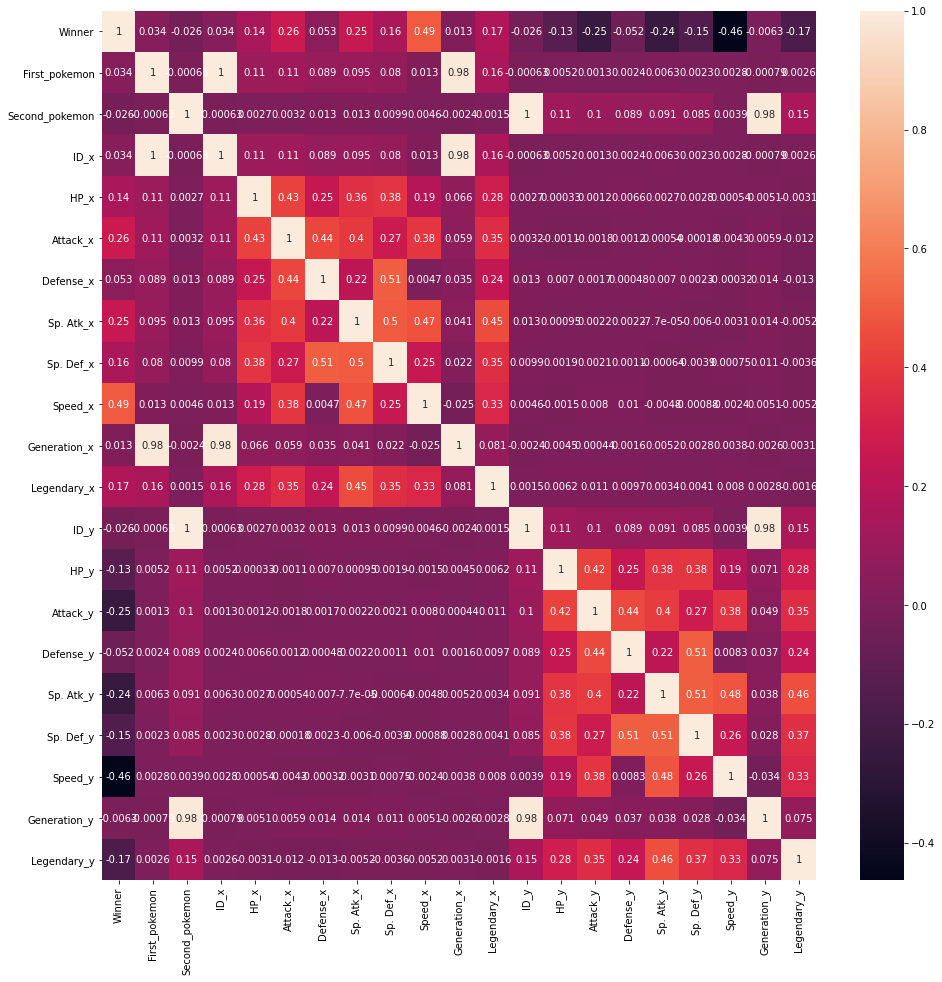

In [368]:
plt.subplots(figsize=(16,16))
sns.heatmap(fights.corr(), annot=True)
plt.show()

##### Dalla heatmap si nota che ciascun pokemon ha una correlazione elevata con la Generation, per cui questa features può essere rimossa. Inoltre, sia Name che ID sono feautures inutili per il mio scopo, verranno eliminate anche queste

####Conteggio del numero di scontri vinti da un pokemon leggendario

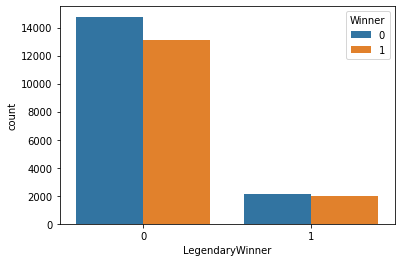

In [369]:
conditions = [
    (fights['Winner'] == 1),
    (fights['Winner'] == 0)]
choices = [fights['Legendary_x'], fights['Legendary_y']]
fights['LegendaryWinner'] = np.select(conditions, choices)
fights.sample(20)
 
sns.countplot(x=fights["LegendaryWinner"],hue=fights["Winner"])
plt.show()

## Feature engineering

In [370]:
#cast di legendary da bool a int
fights["Legendary_x"] = fights["Legendary_x"].astype(int)
fights["Legendary_y"] = fights["Legendary_y"].astype(int)
fights_test["Legendary_x"] = fights_test["Legendary_x"].astype(int)
fights_test["Legendary_y"] = fights_test["Legendary_y"].astype(int)

###Calcolo delle differenze tra i valori del primo e del secondo pokemon

######Piuttosto che considerare i singoli valori delle caratteristiche dei pokemon, considero la differenza tra essi.

#####Name, ID e Generation non vengono considerate perchè irrilevanti ai fini dell'analisi. Vengono quindi scartate implicitamente. 

In [371]:
fights["Sp_Atk_diff"] = fights["Sp. Atk_x"] - fights["Sp. Atk_y"]
fights["Speed_diff"] = fights["Speed_x"] - fights["Speed_y"]
fights["Sp_Def_diff"] = fights["Sp. Def_x"] - fights["Sp. Def_y"]
fights["Defense_diff"] = fights["Defense_x"] - fights["Defense_y"]
fights["HP_diff"] = fights["HP_x"] - fights["HP_y"]
fights["Attack_diff"] = fights["Attack_x"] - fights["Attack_y"]
fights["Legendary_diff"] = fights["Legendary_x"] - fights["Legendary_y"]

fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [372]:
fights_test["Sp_Atk_diff"] = fights_test["Sp. Atk_x"] - fights_test["Sp. Atk_y"]
fights_test["Speed_diff"] = fights_test["Speed_x"] - fights_test["Speed_y"]
fights_test["Sp_Def_diff"] = fights_test["Sp. Def_x"] - fights_test["Sp. Def_y"]
fights_test["Defense_diff"] = fights_test["Defense_x"] - fights_test["Defense_y"]
fights_test["HP_diff"] = fights_test["HP_x"] - fights_test["HP_y"]
fights_test["Attack_diff"] = fights_test["Attack_x"] - fights_test["Attack_y"]
fights_test["Legendary_diff"] = fights_test["Legendary_x"] - fights_test["Legendary_y"]

fights_test = fights_test[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [373]:
fights.sample(15)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
9742,120,95,15,-15,-34,-74,Psychic,Ground,None,Ghost,0,0
19676,-8,-46,-8,-57,16,-67,Water,Rock,None,Water,0,0
22913,40,30,40,70,80,110,Dragon,Dark,Ice,Fire,1,1
31057,33,9,-7,-17,-20,-19,Fire,Ground,None,Dark,0,1
30461,-95,-75,-60,10,-10,-5,Ground,Electric,Rock,Flying,-1,1
10744,0,-49,-5,-15,10,-36,Grass,Bug,None,None,0,0
18819,-37,5,-7,-2,25,-7,Poison,Grass,None,Poison,0,1
11757,10,-22,11,36,20,5,Ground,Bug,None,Poison,0,0
3440,42,72,42,50,60,83,Normal,Normal,Fighting,Flying,0,1
28151,15,65,15,-45,5,15,Normal,Rock,Flying,Ground,0,1


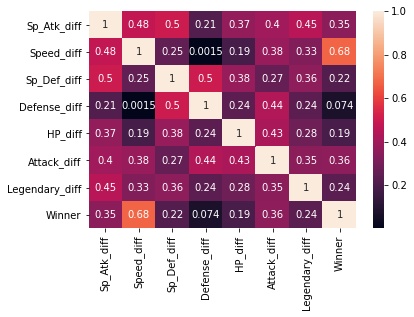

In [374]:
sns.heatmap(fights.corr(), annot=True)
plt.show()

##### La feature 'Defense_diff' ha una correlazione molto bassa, può dunque essere rimossa.

In [375]:
fights = fights.drop('Defense_diff', axis=1)
fights_test = fights_test.drop('Defense_diff', axis=1)

####Verifico se i pokemon leggendari tendono a vincere

## Addestramento del modello

In [376]:
X_train = fights.drop(["Winner"], axis=1)
y_train = fights["Winner"]

X_test = fights_test.drop(["Winner"], axis=1)
y_test = fights_test["Winner"]

#####Label encoder delle colonne Type1 e Type2

In [377]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

Accuracy on training set: 100.00%
Accuracy on test set: 92.97%


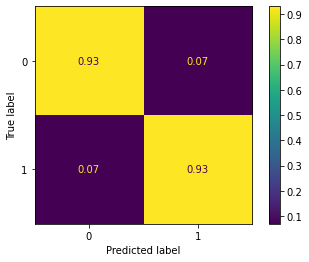

In [378]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
# fase di training
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
model = tree.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}%".format(tree.score(X_train, y_train)*100))

# verifo l'accuracy del modello
print("Accuracy on test set: {:.2f}%".format(tree.score(X_test, y_test)*100))

plot_confusion_matrix(model, X_test, y_test,normalize='true')
plt.show()